<a href="https://colab.research.google.com/github/whatnews72/----/blob/master/mooc3_1_%EB%8B%A4%EC%B6%A9%ED%8D%BC%EC%85%89%ED%8A%B8%EB%A1%A0_%E1%84%8B%E1%85%B5%E1%84%8C%E1%85%B5%E1%86%AB%E1%84%87%E1%85%AE%E1%86%AB%E1%84%85%E1%85%B2(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [Remmind] 신경망(Neural Network)의 이해

## 신경망 (Neural Network)

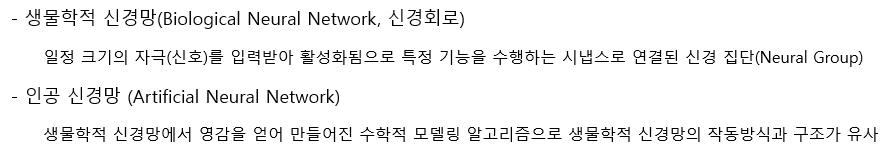

## 뉴런 구성

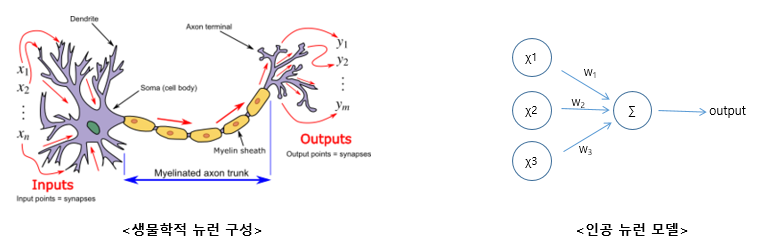

## 다층 퍼센트론의 고도화

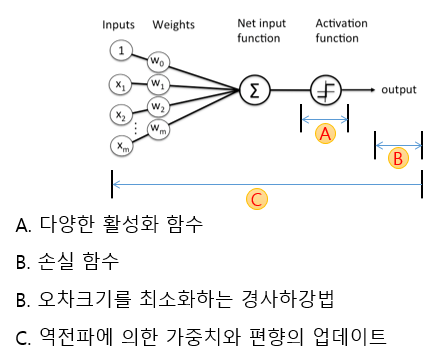

# Task 정의

- 환자의 당뇨병 여부 예측 모델링

# 데이터 세트

- 데이터 세트명 : Pima Indians Diabetes Database
- 데이터 세트 출처 : https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

# 데이터 세트 상세 설명

- 이 데이터 세트는 원래 국립 당뇨병, 소화기 및 신장 질환 연구소에서 가져온 것입니다.
- 데이터 세트의 목적은 데이터 세트에 포함된 특정 진단 측정값을 기반으로 환자에게 당뇨병이 있는지 여부를 진단적으로 예측하는 것입니다.
- 더 큰 데이터베이스에서 이러한 인스턴스를 선택하는 데 몇 가지 제약이 적용되었습니다.
- 특히 이곳의 환자들은 모두 피마 인디언 혈통의 21세 이상의 여성이다.

- 데이터 세트는 여러 개의 의료 예측 변수와 하나의 목표 변수로 구성됩니다. 예측 변수에는 환자의 임신 횟수, BMI, 인슐린 수준, 연령 등이 포함됩니다.

- Pregnancies : Number of times pregnant
- Glucose : Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- BloodPressure : Diastolic blood pressure (mm Hg)
- SkinThickness : Triceps skin fold thickness (mm)
- Insulin : 2-Hour serum insulin (mu U/ml)
- BMI : Body mass index (weight in kg/(height in m)^2)
- DiabetesPedigreeFunction : Diabetes pedigree function (당뇨병 혈통 기능)
- Age : Age (years)
- Outcome : Class variable (0 or 1)

In [1]:
!pip install gdown

In [3]:
# !pip install gdown
import urllib.parse
import gdown
import pandas as pd

# 다운로드 데이터 읽기
#url = 'https://drive.google.com/drive/u/0/my-drive?q=after:2024-04-18%20parent:0AMEf22VWFkNmUk9PVA'
#output = 'diabetes.csv'
#gdown.download(url, output, quiet=False)
data = pd.read_csv('/content/diabetes.csv')
data.shape, display(data.head())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


((768, 9), None)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
data = pd.read_csv('/content/diabetes.csv')
data.shape, display(data.head())

In [ ]:
# !pip install gdown
# import urllib.parse
# import gdown
import pandas as pd

# 다운로드 데이터 읽기
# url = 'https://drive.google.com/drive/u/0/my-drive?q=after:2024-04-18%20parent:0AMEf22VWFkNmUk9PVA'
# output = 'diabetes.csv'
# gdown.download(url, output, quiet=False)
data = pd.read_csv('/content/diabetes.csv')
data.shape, display(data.head())

In [4]:
x_train = data.iloc[:763, :-1] #학습 데이터
y_train = data.iloc[:763, -1:]

x_test = data.iloc[763:, :-1]
y_test = data.iloc[763:, -1:]

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((763, 8), (763, 1), (5, 8), (5, 1))

# 모델링

In [15]:
# 패키지 로드
import numpy as np
import pandas as pd
import tensorflow as tf

# 모델 정의
i = tf.keras.Input(shape=(8, )) #8개의 데이터 입력
x = tf.keras.layers.Dense(15, activation="relu")(i) #10개의 셀
x = tf.keras.layers.Dense(10, activation="relu")(x)
o = tf.keras.layers.Dense(1, activation='sigmoid')(x) #1개의 아웃풋을 내는 레이어
model = tf.keras.Model(inputs=i, outputs=o, name='no2_model')

# 모델 학습 과정 설정
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#BCE로 손실 계산, metircs은 성능 측정항목 설정(정확도에 목표를 둠)

# 모델 학습
model.fit(x_train, y_train, epochs=300, batch_size=32, verbose=1)
#입력값, 정답값, 학습횟수 100, 1회 학습 시 데이터 수, 출력 결과 표시 여부(0이면 출력 안됨)


Epoch 1/300
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.6270 - loss: 0.6853
Epoch 2/300
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6359 - loss: 0.6389   
Epoch 3/300
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6439 - loss: 0.6272  
Epoch 4/300
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6554 - loss: 0.6001 
Epoch 5/300
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6617 - loss: 0.5899
Epoch 6/300
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6862 - loss: 0.5493 
Epoch 7/300
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7127 - loss: 0.5462 
Epoch 8/300
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7054 - loss: 0.5327 
Epoch 9/300
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6989 - loss: 0.5329 
Epoch 10/300
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7590 - loss: 0.5123 
Epoch 11/300
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7577 - loss: 0.5073 
Epoch 12/300
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/ste

# 모델 평가

In [10]:
#import sklearn
#from sklearn.preprocessing import StandardScaler

#scaler = StandardScaler()
#x_train = scaler.fit_transform(x_train)
#x_test = scaler.fit_transform(x_test)

In [11]:
# 패키지 로드
#import numpy as np
#import pandas as pd
#import tensorflow as tf

# 모델 정의
#i = tf.keras.Input(shape=(8, )) #8개의 데이터 입력
#x = tf.keras.layers.Dense(500, activation="relu")(i) #10개의 셀
# x = tf.keras.layers.Dense(8, activation="relu")(x) #5개의 셀
#o = tf.keras.layers.Dense(1, activation='sigmoid')(x) #1개의 아웃풋을 내는 레이어
#model = tf.keras.Model(inputs=i, outputs=o, name='no2_model')

# 모델 학습 과정 설정
#model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#BCE로 손실 계산, metircs은 성능 측정항목 설정(정확도에 목표를 둠)

# 모델 학습
#model.fit(x_train, y_train, epochs=200, batch_size=10, verbose=2)
#입력값, 정답값, 학습횟수, 1회 학습 시 데이터 수, 출력 결과 표시 여부(0이면 출력 안됨)


Epoch 1/200
77/77 - 2s - 22ms/step - accuracy: 0.7457 - loss: 0.5441
Epoch 2/200
77/77 - 0s - 5ms/step - accuracy: 0.7772 - loss: 0.4689
Epoch 3/200
77/77 - 0s - 2ms/step - accuracy: 0.7798 - loss: 0.4585
Epoch 4/200
77/77 - 0s - 2ms/step - accuracy: 0.7851 - loss: 0.4535
Epoch 5/200
77/77 - 0s - 2ms/step - accuracy: 0.7890 - loss: 0.4432
Epoch 6/200
77/77 - 0s - 2ms/step - accuracy: 0.7864 - loss: 0.4410
Epoch 7/200
77/77 - 0s - 2ms/step - accuracy: 0.7864 - loss: 0.4392
Epoch 8/200
77/77 - 0s - 2ms/step - accuracy: 0.7929 - loss: 0.4365
Epoch 9/200
77/77 - 0s - 2ms/step - accuracy: 0.7969 - loss: 0.4315
Epoch 10/200
77/77 - 0s - 2ms/step - accuracy: 0.7955 - loss: 0.4351
Epoch 11/200
77/77 - 0s - 2ms/step - accuracy: 0.7916 - loss: 0.4303
Epoch 12/200
77/77 - 0s - 2ms/step - accuracy: 0.8060 - loss: 0.4236
Epoch 13/200
77/77 - 0s - 2ms/step - accuracy: 0.7942 - loss: 0.4262
Epoch 14/200
77/77 - 0s - 2ms/step - accuracy: 0.8008 - loss: 0.4218
Epoch 15/200
77/77 - 0s - 2ms/step - accur

In [16]:
# 모델 평가
score = model.evaluate(x_test, y_test)
print("%s: %.2f%%" %(model.metrics_names[1], score[1]*100))
#데이터가 입력되면 80%로 알아낼 수 있음

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step - accuracy: 0.8000 - loss: 0.6402
compile_metrics: 80.00%


In [17]:
# score 점수를 파일로 저장
fname = 'Week3_1.txt'
f = open(f'{fname}', 'w')
f.write(str(score[1]))
f.close()

# 모델 이해

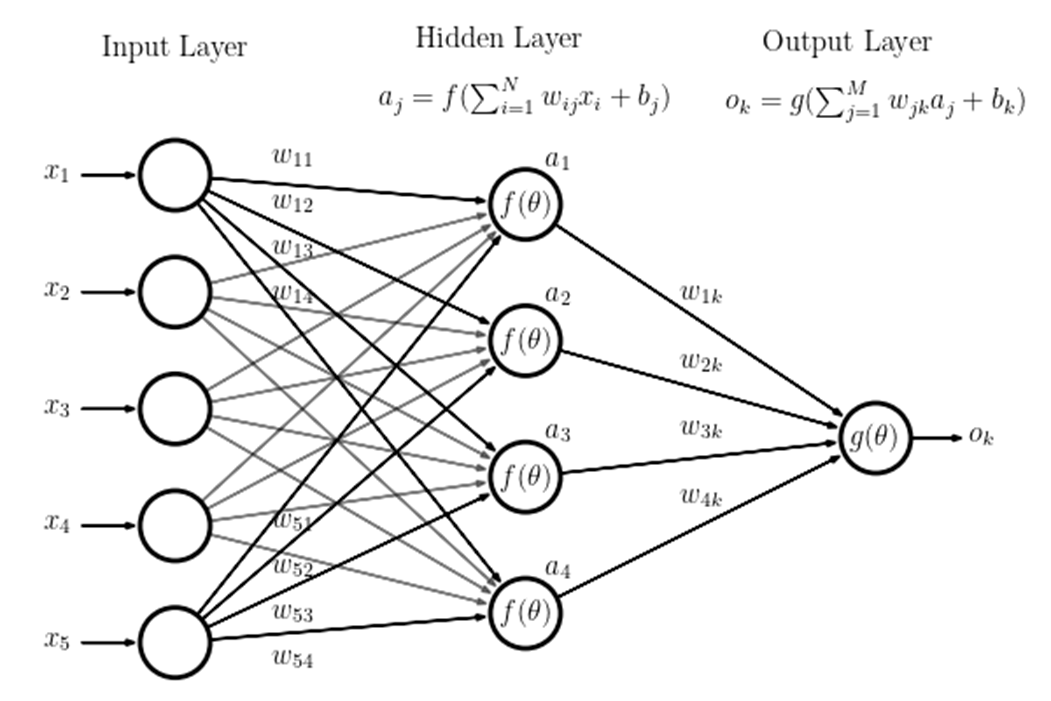

# 모델 요약

In [18]:
# 모델 요약
model.summary()

Model: "no2_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)           │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 15)                  │             135 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 10)                  │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 920 (3.60 KB)

 Trainable params: 306 (1.20 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 614 (2.40 KB)

# 가중치 확인

In [19]:
# 가중치 확인
model.get_weights()

[array([[-1.24721937e-01, -5.61235905e-01, -6.75103664e-01,
          8.19767952e-01,  2.60770380e-01,  4.20950174e-01,
         -6.20758608e-02,  8.90050754e-02,  1.21769175e-01,
          6.89537764e-01, -6.58120632e-01, -1.79286659e-01,
          4.01806772e-01,  3.43826413e-02, -3.32297012e-02],
        [ 3.79806273e-02,  7.14740813e-01,  3.19177657e-01,
          2.59935737e-01, -4.91860956e-01, -3.54604244e-01,
          4.94269103e-01,  1.96228415e-01,  5.47761440e-01,
         -3.60248797e-02,  6.96146429e-01, -1.34564847e-01,
          5.65151751e-01,  8.80618393e-02, -8.81348178e-02],
        [ 4.60620701e-01,  6.08426392e-01,  3.14424396e-01,
          8.58458161e-01,  3.15169424e-01,  5.32050014e-01,
         -3.16735834e-01,  1.99832484e-01,  4.53930944e-02,
         -1.43018648e-01,  1.07458137e-01, -9.00910515e-03,
         -3.31276447e-01, -7.10694194e-02, -7.39268184e-01],
        [ 1.68088630e-01,  2.34456323e-02,  3.07906777e-01,
         -6.33582294e-01, -3.89198899

# 예측

In [20]:
# 예측
model.predict(x_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


array([[0.49940562],
       [0.8801944 ],
       [0.18460663],
       [0.8356587 ],
       [0.00345238]], dtype=float32)

In [21]:
# 예측 데이터의 정답
y_test

,Outcome
763,0
764,0
765,0
766,1
767,0


In [22]:
x_test

array([[ 1.80795671, -0.8859351 ,  1.21295687,  1.43611881,  1.62811462,
         0.46354635, -1.68032759,  1.6733736 ],
       [-0.52489066,  0.71791293,  0.0758098 ,  0.07762804, -0.78192347,
         1.57949128,  0.83272872, -0.73628438],
       [ 0.34992711,  0.64153921,  0.45485883, -0.1811321 ,  0.71765579,
        -1.4535898 , -0.57993607, -0.53547955],
       [-0.81649658,  1.02340779, -1.8194353 , -1.66900294, -0.78192347,
        -0.33764487,  0.96656012,  0.6024145 ],
       [-0.81649658, -1.49692483,  0.0758098 ,  0.33638819, -0.78192347,
        -0.25180296,  0.46097482, -1.00402416]])

# [실습 평가 방법]

본 프로그램을 실행한 후 생성되는 y_pred.csv 파일을 실습 평가 사이트에 등록하여 0.8 이상 획득 필요

In [24]:
# 모델 추론
y_pred_prob = model.predict(x_test)

# 확률을 클래스 라벨로 변환 (0.5를 기준으로)
y_pred = (y_pred_prob > 0.5).astype(int)

# y_pred를 DataFrame으로 변환 후 CSV 파일로 저장
y_pred_df = pd.DataFrame(y_pred)
y_pred_df.to_csv('y_pred_3_1.csv', index=False, header=False)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


<font size=5> [예측결과 제출](https://aifactory.space/task/2585/overview) </font>

# End Of Program